In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import warnings
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN
from sklearn.cluster import AffinityPropagation
import mglearn
from sklearn import metrics
warnings.filterwarnings(action='ignore') 


In [2]:
df = pd.read_csv('dataset_Facebook.csv')

In [3]:
df

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,85093,Photo,3,1,7,2,0.0,4684,7536,733,708,985,4750,2876,392,5,53.0,26.0,84
496,81370,Photo,2,1,5,8,0.0,3480,6229,537,508,687,3961,2104,301,0,53.0,22.0,75
497,81370,Photo,1,1,5,2,0.0,3778,7216,625,572,795,4742,2388,363,4,93.0,18.0,115
498,81370,Photo,3,1,4,11,0.0,4156,7564,626,574,832,4534,2452,370,7,91.0,38.0,136


In [4]:
# 게시 후 알 수 있는 정보 변수들만 따로 추출
continuous_target_columns = ['Page total likes', 'Lifetime Post Total Reach', 'Lifetime Post Total Impressions', 'Lifetime Engaged Users', 'Lifetime Post Consumers', 'Lifetime Post Consumptions', 'Lifetime Post Impressions by people who have liked your Page', 'Lifetime Post reach by people who like your Page', 'Lifetime People who have liked your Page and engaged with your post', 'comment', 'like', 'share', 'Total Interactions', 'Category']
continuous_columns = ['Page total likes', 'Lifetime Post Total Reach', 'Lifetime Post Total Impressions', 'Lifetime Engaged Users', 'Lifetime Post Consumers', 'Lifetime Post Consumptions', 'Lifetime Post Impressions by people who have liked your Page', 'Lifetime Post reach by people who like your Page', 'Lifetime People who have liked your Page and engaged with your post', 'comment', 'like', 'share', 'Total Interactions']
df_continuous_target = df[continuous_target_columns]

In [5]:
df_continuous_target

,Page total likes,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions,Category
0,139441,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100,2
1,139441,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164,2
2,139441,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80,3
3,139441,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777,2
4,139441,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,85093,4684,7536,733,708,985,4750,2876,392,5,53.0,26.0,84,3
496,81370,3480,6229,537,508,687,3961,2104,301,0,53.0,22.0,75,2
497,81370,3778,7216,625,572,795,4742,2388,363,4,93.0,18.0,115,1
498,81370,4156,7564,626,574,832,4534,2452,370,7,91.0,38.0,136,3


In [6]:
# 결측치 제거
df_continuous_target.dropna(inplace=True)
df_continuous_target

,Page total likes,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions,Category
0,139441,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100,2
1,139441,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164,2
2,139441,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80,3
3,139441,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777,2
4,139441,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,85093,4684,7536,733,708,985,4750,2876,392,5,53.0,26.0,84,3
496,81370,3480,6229,537,508,687,3961,2104,301,0,53.0,22.0,75,2
497,81370,3778,7216,625,572,795,4742,2388,363,4,93.0,18.0,115,1
498,81370,4156,7564,626,574,832,4534,2452,370,7,91.0,38.0,136,3


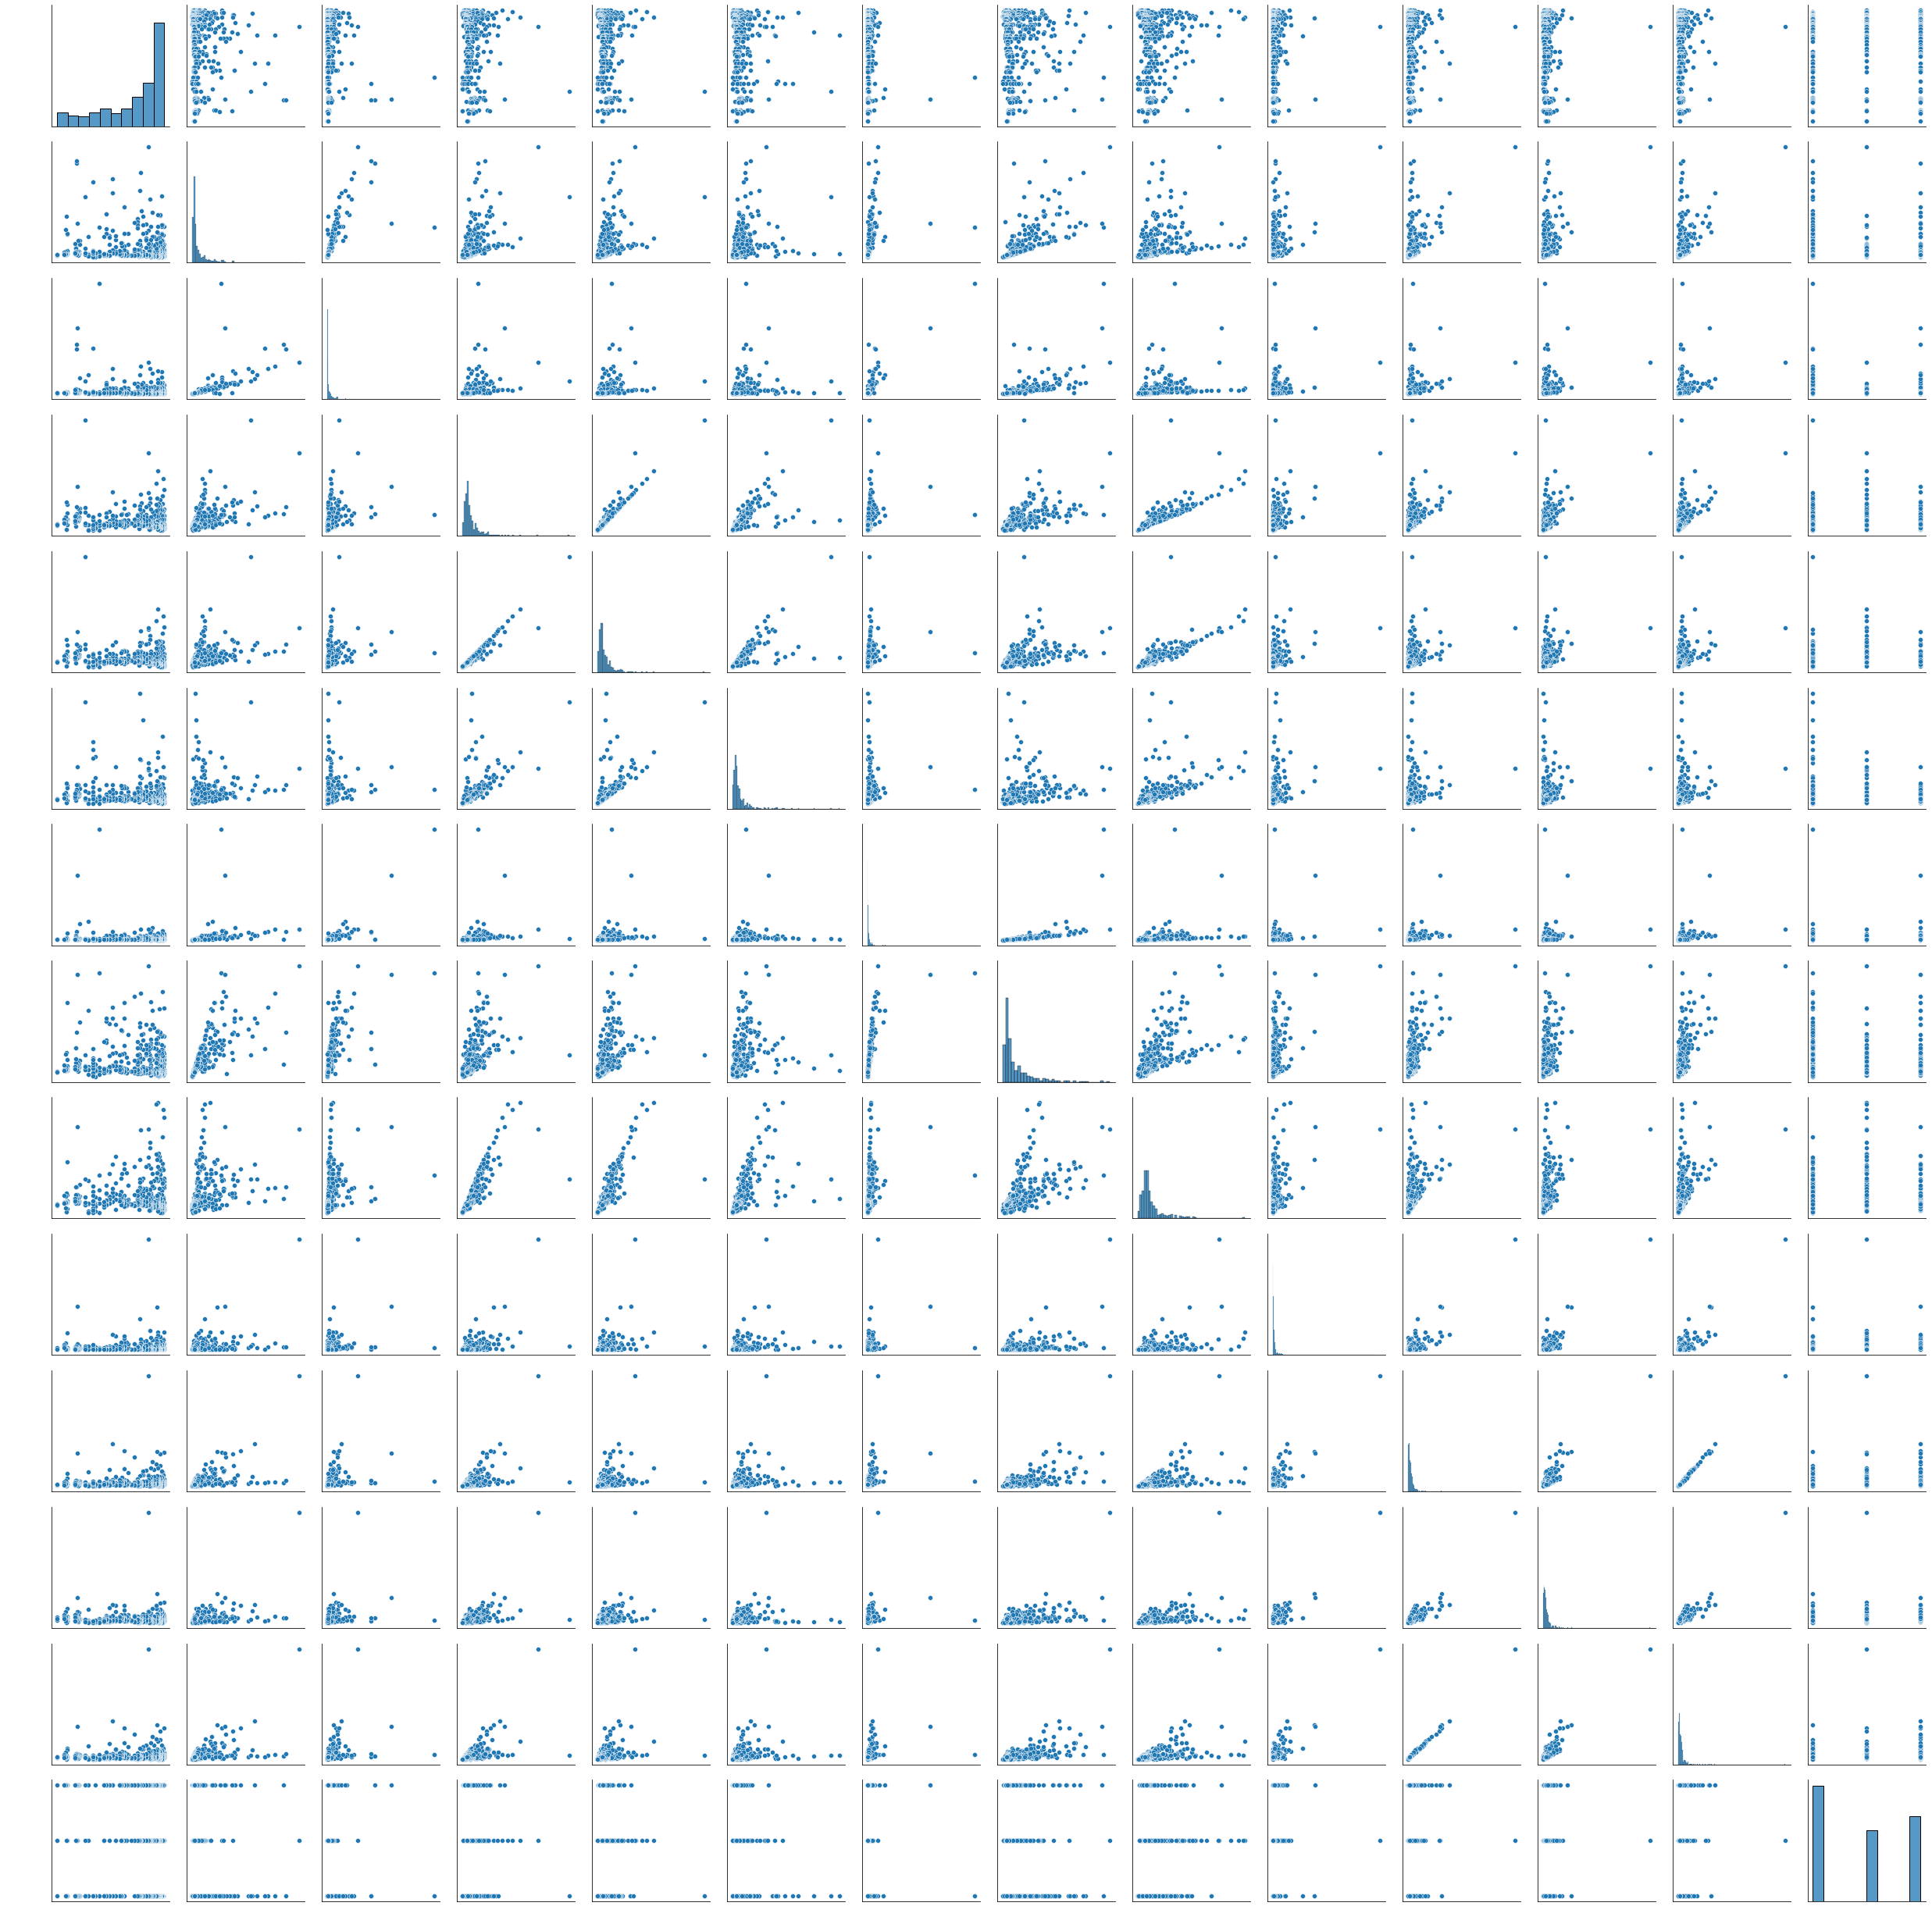

In [7]:
sns.pairplot(df_continuous_target)

In [8]:
df_category = df_continuous_target['Category']
df_continuous = df_continuous_target.drop(['Category'], axis=1)
df_continuous

,Page total likes,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,85093,4684,7536,733,708,985,4750,2876,392,5,53.0,26.0,84
496,81370,3480,6229,537,508,687,3961,2104,301,0,53.0,22.0,75
497,81370,3778,7216,625,572,795,4742,2388,363,4,93.0,18.0,115
498,81370,4156,7564,626,574,832,4534,2452,370,7,91.0,38.0,136


In [9]:
df_category

0      2
1      2
2      3
3      2
4      2
      ..
495    3
496    2
497    1
498    3
499    2
Name: Category, Length: 496, dtype: int64

<AxesSubplot:>

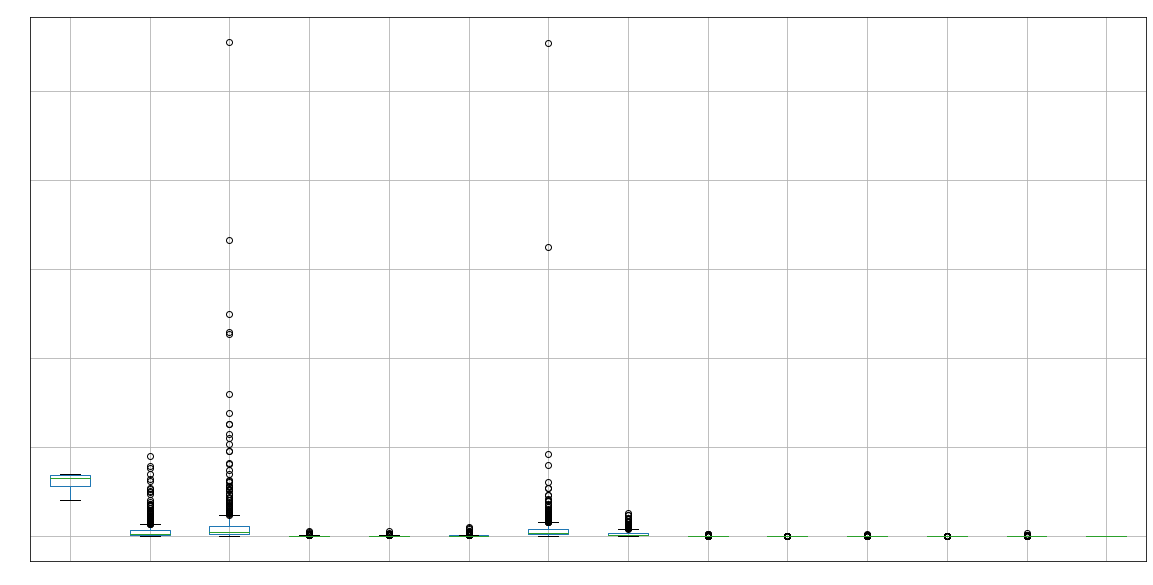

In [10]:
# 이상치 탐색
df_continuous_target.boxplot(figsize=(20,10))

In [11]:
## 이상치 IQR 통해 제거하는 코드인데 함부로 없애면 안 될 것 같음
# Q1 = df_continuous_target.quantile(0.25)
# Q3 = df_continuous_target.quantile(0.75)
# IQR = Q3 - Q1

# df_continuous_target = df_continuous_target[~((df_continuous_target < (Q1 - 1.5 * IQR)) | (df_continuous_target > (Q3 + 1.5 * IQR))).any(axis=1)]

# # 이상치 제거 후 상자그림 재출력
# df_continuous_target.boxplot(figsize=(20,10))

In [12]:
# MinMaxScaler 이용한 표준화
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_continuous)
data_scaled = pd.DataFrame(data_scaled, columns=continuous_columns)

# 원본데이터 MinMaxScaler 차원축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_scaled)

In [13]:
print('Explained variance ratio:', pca.explained_variance_ratio_)

Explained variance ratio: [0.43997005 0.34080275]


In [14]:
df_category

0      2
1      2
2      3
3      2
4      2
      ..
495    3
496    2
497    1
498    3
499    2
Name: Category, Length: 496, dtype: int64

In [15]:
df_pca = pd.DataFrame(X_pca)
df_category = df_category.reset_index()
Data = pd.concat([df_pca, df_category], ignore_index=True, axis=1)
Data = Data.drop(Data.columns[2], axis=1)
Data.columns = ['X', 'Y', 'Category']

In [16]:
Data

,X,Y,Category
0,-0.319177,-0.122060,2
1,-0.260394,0.128447,2
2,-0.319954,-0.125819,3
3,-0.147068,0.650572,2
4,-0.296418,-0.015496,2
...,...,...,...
491,0.608438,-0.260250,3
492,0.661649,-0.310702,2
493,0.665536,-0.292371,1
494,0.667025,-0.284795,3


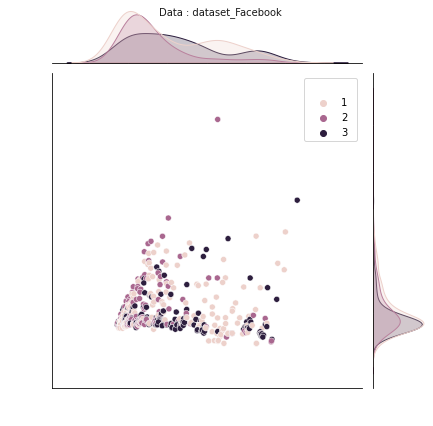

In [17]:
# 실제 레이블 기준으로 군집화(비교 척도)
def original():
    palette = sns.color_palette('dark')
    G = sns.jointplot(x = 'X', y = 'Y', data = Data, kind='scatter', hue = "Category", color=palette[0])
    G.fig.suptitle("Data : dataset_Facebook" , fontsize = 10, color = 'black', alpha = 0.9)
original()

## K-Means 군집화

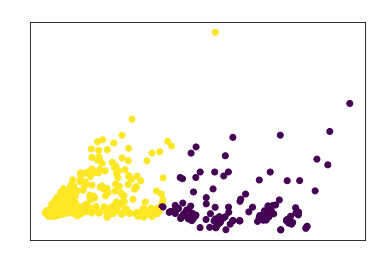

n_clusters=2, silhouette score=0.515, sse=39.6


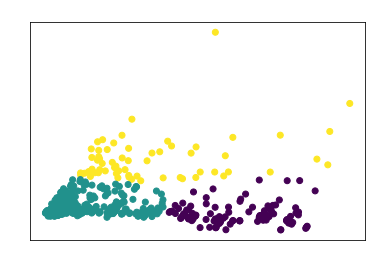

n_clusters=3, silhouette score=0.567, sse=21.5


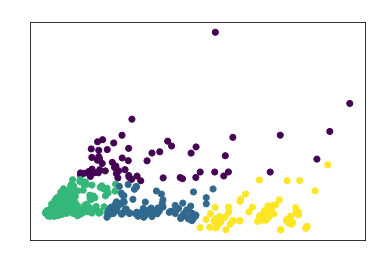

n_clusters=4, silhouette score=0.470, sse=17.3


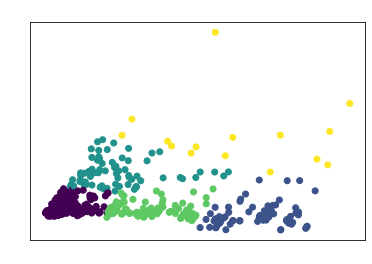

n_clusters=5, silhouette score=0.495, sse=13.0


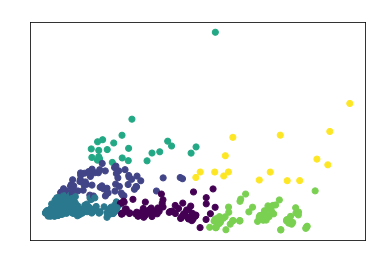

n_clusters=6, silhouette score=0.503, sse=10.9


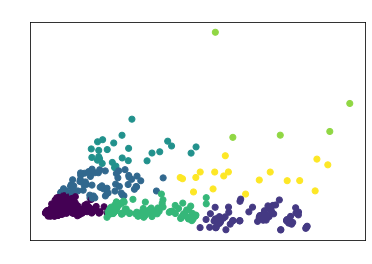

n_clusters=7, silhouette score=0.508, sse=8.8


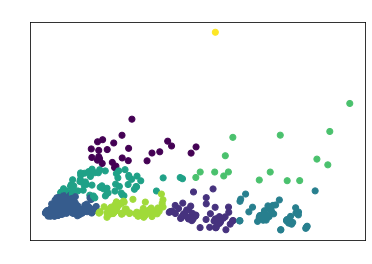

n_clusters=8, silhouette score=0.483, sse=7.3


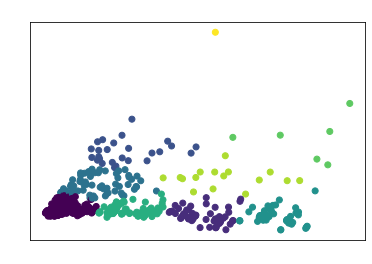

n_clusters=9, silhouette score=0.492, sse=6.1


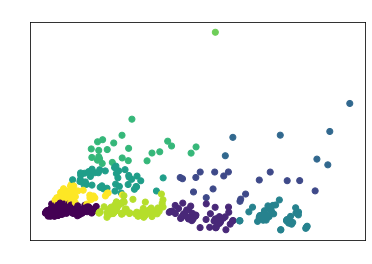

n_clusters=10, silhouette score=0.474, sse=5.3


In [18]:
# K-means 군집화
n_clusters = range(2, 11)
sse = []
for n in n_clusters:
    kmeans = KMeans(n_clusters=n, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_pca)
    
    # 군집화 결과 시각화
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels)
    plt.title(f"K-means Clustering (n_clusters={n})")
    plt.show()
    
    # 실루엣 스코어 계산
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    print(f"n_clusters={n}, silhouette score={silhouette_avg:.3f}, sse={kmeans.inertia_:.1f}")
    
    # 군집 수 별로 sse 저장
    sse.append(kmeans.inertia_)

In [19]:
sse

[39.61712552177713,
 21.534616954952785,
 17.25798432652422,
 13.01521415201054,
 10.934784595726292,
 8.791732281883649,
 7.283135140556029,
 6.1114702502612,
 5.306625645317724]

실루엣 계수는 군집 개수를 3으로 설정할 때 0.567로 가장 높았다.

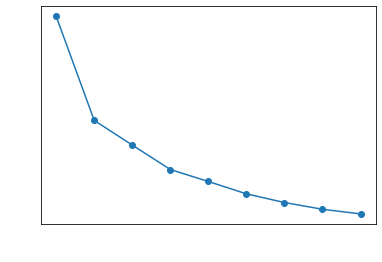

In [20]:
# SSE 그래프 그리기
plt.plot(range(2, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()


## 계층적 군집화

In [21]:
def Fixed_Dendrogram(Data, Num_of_p, Full_Use, link):
    Linkage_Matrix = linkage(Data,link)
    if(Full_Use == True):
        Num_of_p = np.shape(Data)[0]
        plt.title('Hierarchical Clustering Dendrogram')
        plt.xlabel('sample index')
    else:
        plt.title('Hierarchical Clustering Dendrogram')
        plt.xlabel('sample index or (cluster size)')
    plt.ylabel('distance')
    dendrogram(
        Linkage_Matrix,
        truncate_mode = 'lastp',  
        p = Num_of_p, 
        leaf_rotation = 90.,
        leaf_font_size = 12.,
        color_threshold = 'default'
    )

#### 덴드로그램 그리기

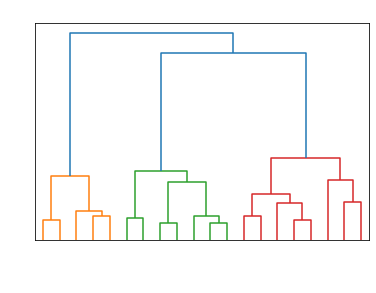

In [22]:
# 20 leaf node 생성
Fixed_Dendrogram(X_pca ,20, False, 'ward')

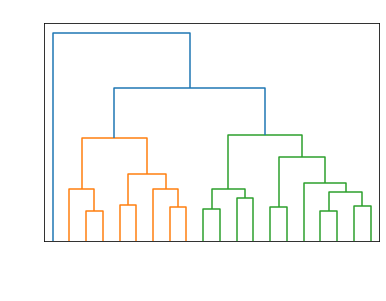

In [23]:
Fixed_Dendrogram(X_pca ,20, False, 'complete')

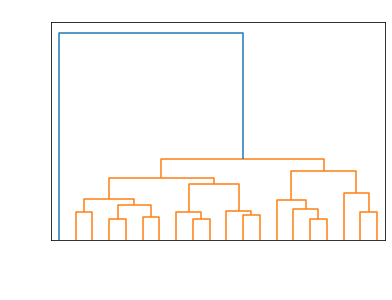

In [24]:
Fixed_Dendrogram(X_pca ,20, False, 'average')

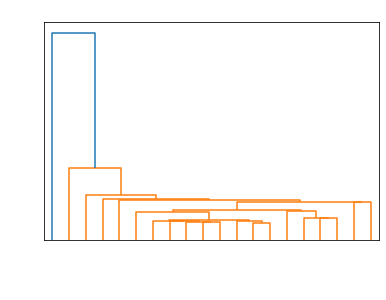

In [25]:
Fixed_Dendrogram(X_pca ,20, False, 'single')

n_clusters=2, silhouette score=0.470


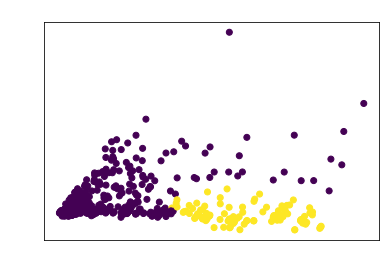

n_clusters=3, silhouette score=0.556


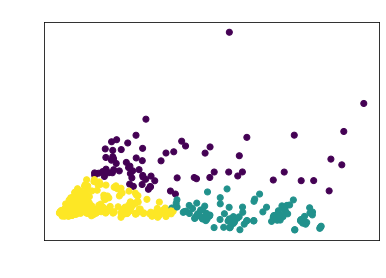

n_clusters=4, silhouette score=0.557


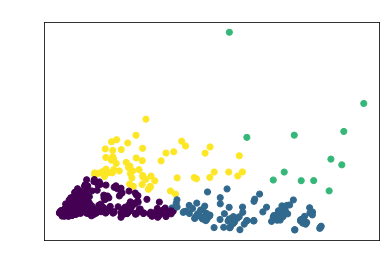

n_clusters=5, silhouette score=0.414


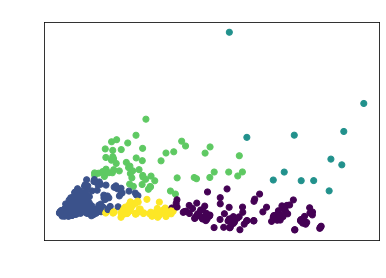

n_clusters=6, silhouette score=0.423


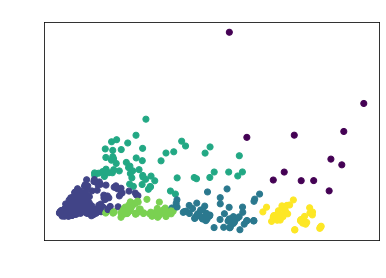

n_clusters=7, silhouette score=0.424


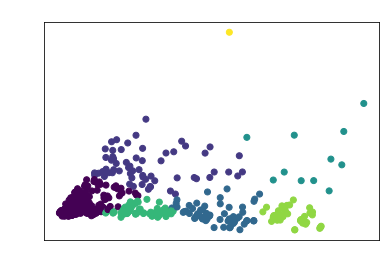

n_clusters=8, silhouette score=0.449


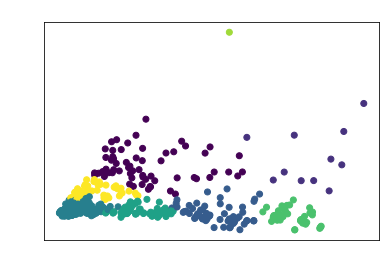

n_clusters=9, silhouette score=0.459


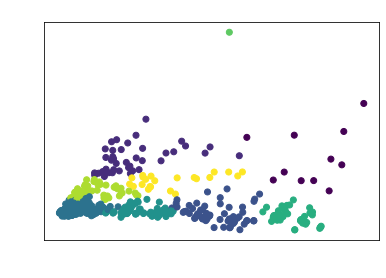

n_clusters=10, silhouette score=0.463


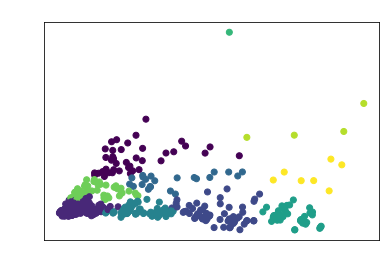

n_clusters=11, silhouette score=0.469


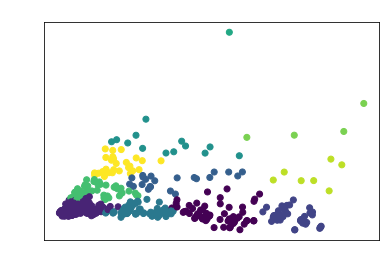

n_clusters=12, silhouette score=0.455


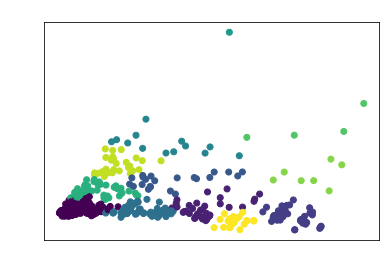

n_clusters=13, silhouette score=0.378


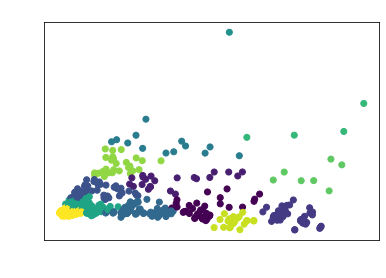

n_clusters=14, silhouette score=0.382


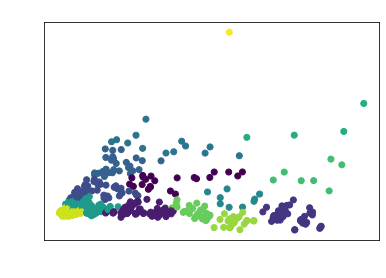

n_clusters=15, silhouette score=0.381


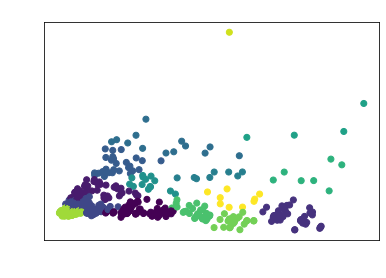

n_clusters=16, silhouette score=0.387


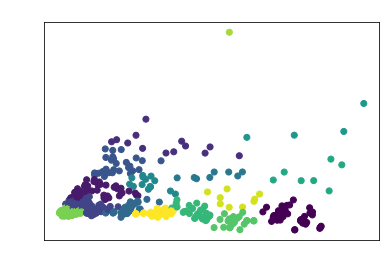

n_clusters=17, silhouette score=0.387


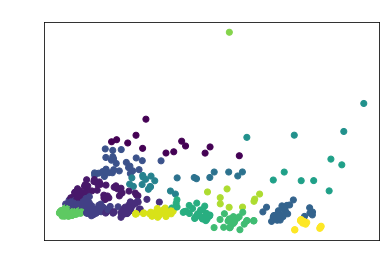

n_clusters=18, silhouette score=0.387


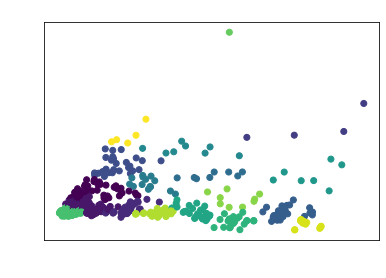

n_clusters=19, silhouette score=0.392


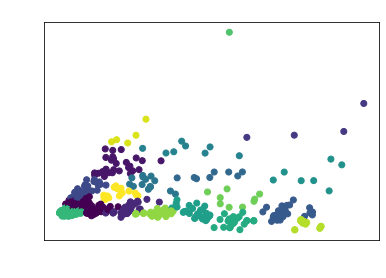

In [26]:
# 클러스터링 결과 시각화 함수
def plot_clusters(X, clusters):
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Agglomerative Clustering with {} Clusters'.format(len(set(clusters))))
    plt.show()

# 클러스터 수를 2~6까지 바꿔가며 군집화 및 시각화
for n_clusters in range(2, 20):
    # 군집화 모델 생성
    model = AgglomerativeClustering(n_clusters=n_clusters)
    # 모델 학습
    clusters = model.fit_predict(X_pca)
    # 실루엣 스코어 계산
    silhouette_avg = silhouette_score(X_pca, clusters)
    print(f"n_clusters={n_clusters}, silhouette score={silhouette_avg:.3f}")
    # 결과 시각화
    plot_clusters(X_pca, clusters)    

실루엣 계수는 군집 수가 3일 때 0.556, 4일 때 0.557로 가장 높았다.

In [27]:
def Hclust_Plot(X_pca,Select_k,link): 
    fig, axes = plt.subplots(1, (np.max(list(Select_k))-np.min(list(Select_k)))+1, figsize=(15, 4))
    for i in Select_k:
        H_Clustering = AgglomerativeClustering(n_clusters=i, linkage=link)
        P_Labels = H_Clustering.fit_predict(X_pca)
        mglearn.discrete_scatter(X_pca[:,0], X_pca[:,1], P_Labels, ax=axes[i - 2], s=5)        
        axes[i - 2].set_title('k = ' + str(i))
        Score=np.round(silhouette_score(X_pca,P_Labels),3)
        axes[i - 2].set_title('k = ' + str(i)+' / S_Score:'+str(Score))
    
    # 실제 레이블 기준으로 군집화(비교 척도)
    original() 

In [28]:
def Hclust_silhoutte(X_pca,Select_k,link):
    for i in Select_k:
        H_Clustering = AgglomerativeClustering(n_clusters=i, linkage=link)
        P_Labels = H_Clustering.fit_predict(X_pca)
        Score=np.round(silhouette_score(X_pca,P_Labels),3)
        print(f"n_clusters={i}, silhouette score={Score}")
        
        

In [29]:
Hclust_silhoutte(X_pca, range(2,7), 'ward')
print()
Hclust_silhoutte(X_pca, range(2,7), 'complete')
print()
Hclust_silhoutte(X_pca, range(2,7), 'average')
print()
Hclust_silhoutte(X_pca, range(2,7), 'single')

n_clusters=2, silhouette score=0.47
n_clusters=3, silhouette score=0.556
n_clusters=4, silhouette score=0.557
n_clusters=5, silhouette score=0.414
n_clusters=6, silhouette score=0.423

n_clusters=2, silhouette score=0.784
n_clusters=3, silhouette score=0.472
n_clusters=4, silhouette score=0.529
n_clusters=5, silhouette score=0.52
n_clusters=6, silhouette score=0.505

n_clusters=2, silhouette score=0.784
n_clusters=3, silhouette score=0.505
n_clusters=4, silhouette score=0.463
n_clusters=5, silhouette score=0.513
n_clusters=6, silhouette score=0.501

n_clusters=2, silhouette score=0.784
n_clusters=3, silhouette score=0.688
n_clusters=4, silhouette score=0.5
n_clusters=5, silhouette score=0.469
n_clusters=6, silhouette score=0.471


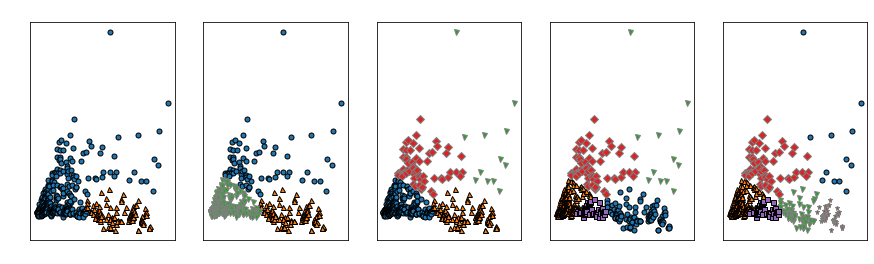

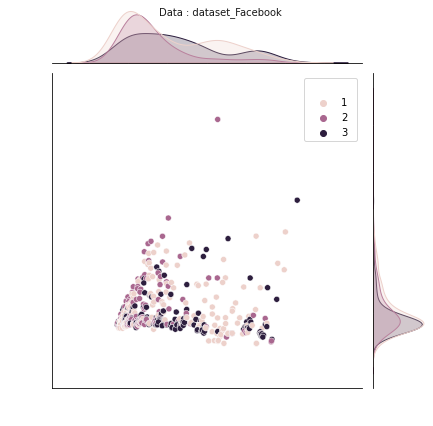

In [30]:
# 워드 연결 방법을 사용
Hclust_Plot(X_pca, range(2,7), 'ward')

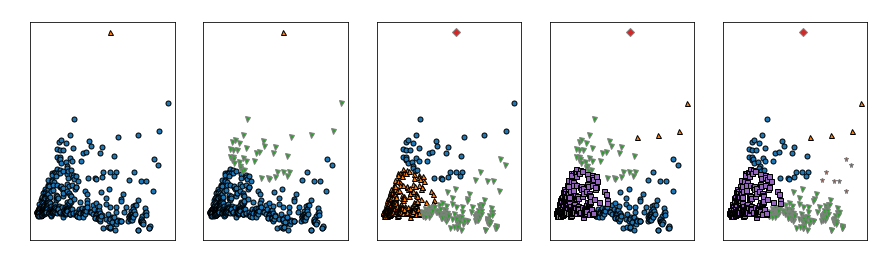

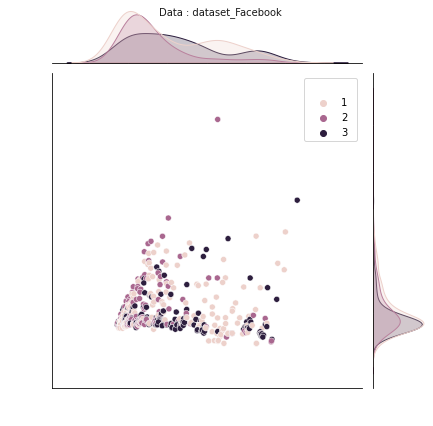

In [31]:
# 전체 연결 방법을 사용
Hclust_Plot(X_pca, range(2,7), 'complete')

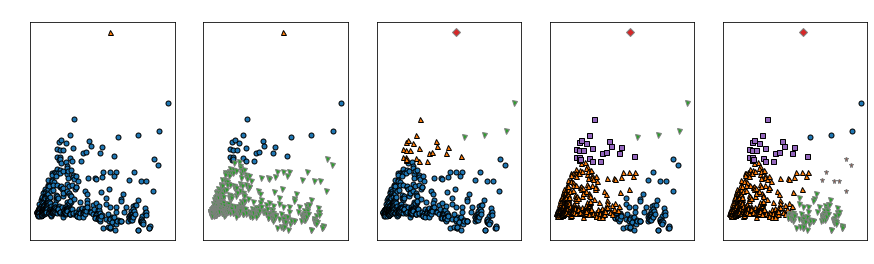

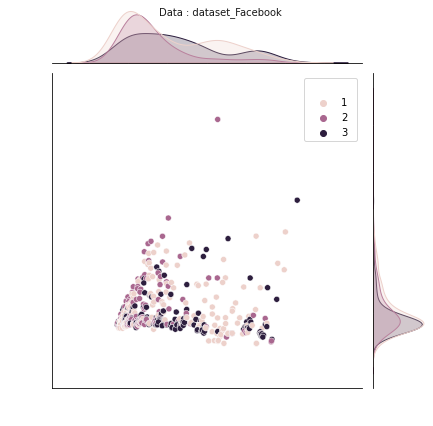

In [32]:
# 평균 연결 방법을 사용
Hclust_Plot(X_pca, range(2,7), 'average')

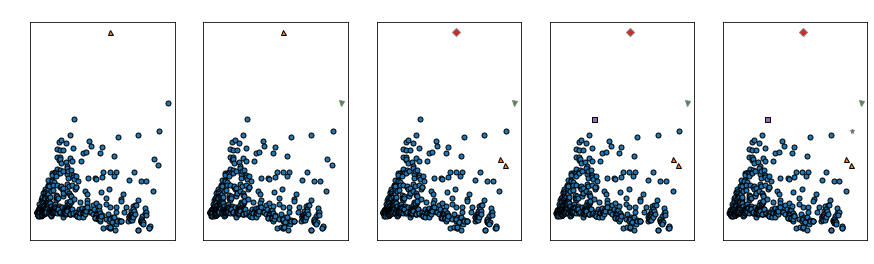

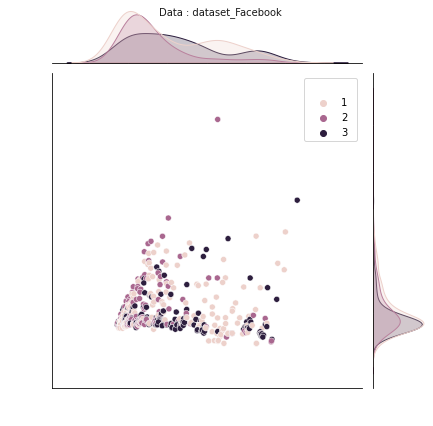

In [33]:
# 단일 연결 방법을 사용
Hclust_Plot(X_pca, range(2,7), 'single')

## DBSCAN 군집화

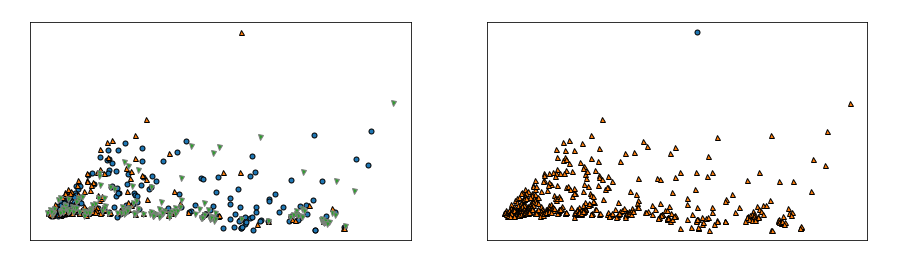

In [34]:
def DBSCAN_Plot(Data,NAME,min_samples=5,eps=0.4):
    Data2 = Data[['X', 'Y']]
    Append_k_Means_Results = list()
    fig, axes = plt.subplots(1, 2, figsize=(15, 4))
    Set_DBSCAN_Hyperparameter=DBSCAN(min_samples=min_samples,eps=eps)
    Results = Set_DBSCAN_Hyperparameter.fit_predict(Data2)
    Score=np.round(silhouette_score(Data2,Results),3)
    
    # 실제 레이블 기준으로 군집화(비교 척도)
    mglearn.discrete_scatter(Data2['X'], Data2['Y'], Data['Category'], ax=axes[0], s=5)
    axes[0].set_title("Data:" + NAME + 'GroundTruth')
    
    # 예측 군집화
    mglearn.discrete_scatter(Data2['X'], Data2['Y'], Results, ax=axes[1], s=5)
    axes[1].set_title("Data:" + NAME + ' DBSCAN/ eps:'+str(eps)+' / min_sample:'+str(min_samples)+'/ S_score:'+str(Score))

DBSCAN_Plot(Data=Data,NAME="dataset_Facebook")


In [35]:
def DBSCAN_silhoutte(Data,min_samples,eps):
    Data2 = Data[['X', 'Y']]
    Set_DBSCAN_Hyperparameter=DBSCAN(min_samples=min_samples,eps=eps)
    Results = Set_DBSCAN_Hyperparameter.fit_predict(Data2)
    Score=np.round(silhouette_score(Data2,Results),3)
    print('DBSCAN/ eps:'+str(eps)+' / min_sample:'+str(min_samples)+'/ S_score:'+str(Score))

In [36]:
Data

,X,Y,Category
0,-0.319177,-0.122060,2
1,-0.260394,0.128447,2
2,-0.319954,-0.125819,3
3,-0.147068,0.650572,2
4,-0.296418,-0.015496,2
...,...,...,...
491,0.608438,-0.260250,3
492,0.661649,-0.310702,2
493,0.665536,-0.292371,1
494,0.667025,-0.284795,3


In [37]:
DBSCAN_silhoutte(Data=Data,min_samples=7,eps=0.05)
DBSCAN_silhoutte(Data=Data,min_samples=7,eps=0.10)
DBSCAN_silhoutte(Data=Data,min_samples=7,eps=0.15)
DBSCAN_silhoutte(Data=Data,min_samples=7,eps=0.20)
DBSCAN_silhoutte(Data=Data,min_samples=5,eps=0.25)
DBSCAN_silhoutte(Data=Data,min_samples=5,eps=0.30)
DBSCAN_silhoutte(Data=Data,min_samples=5,eps=0.35)
DBSCAN_silhoutte(Data=Data,min_samples=5,eps=0.40)


DBSCAN/ eps:0.05 / min_sample:7/ S_score:-0.108
DBSCAN/ eps:0.1 / min_sample:7/ S_score:0.497
DBSCAN/ eps:0.15 / min_sample:7/ S_score:0.569
DBSCAN/ eps:0.2 / min_sample:7/ S_score:0.651
DBSCAN/ eps:0.25 / min_sample:5/ S_score:0.717
DBSCAN/ eps:0.3 / min_sample:5/ S_score:0.717
DBSCAN/ eps:0.35 / min_sample:5/ S_score:0.748
DBSCAN/ eps:0.4 / min_sample:5/ S_score:0.784


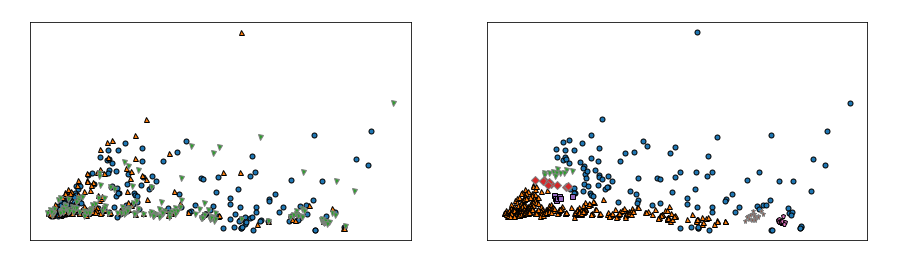

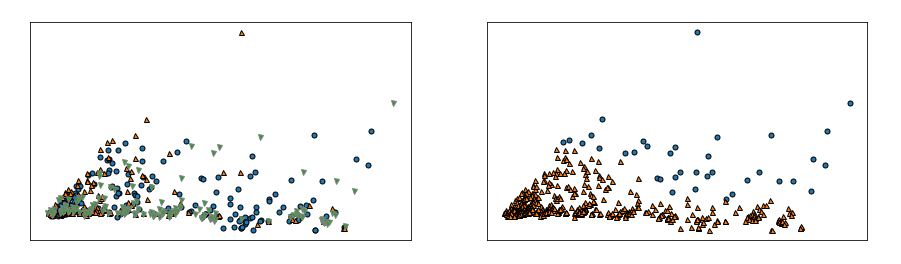

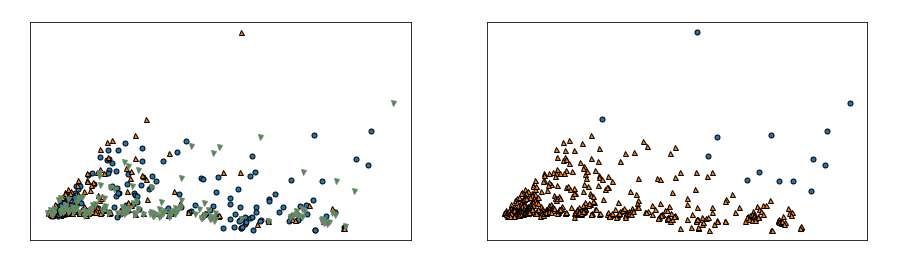

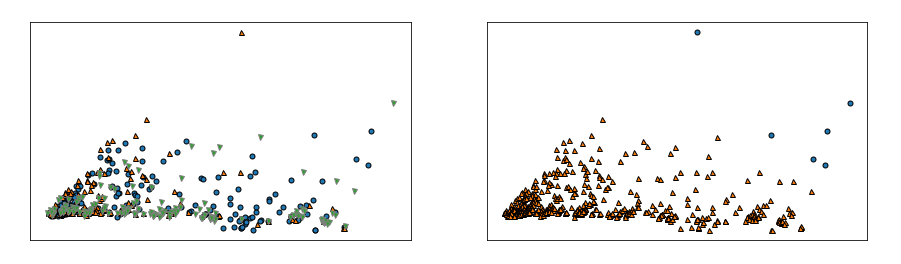

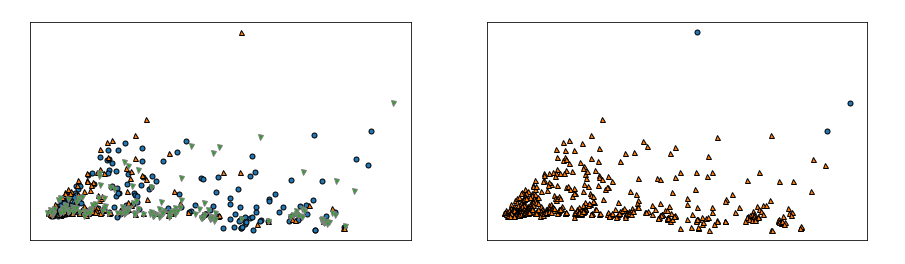

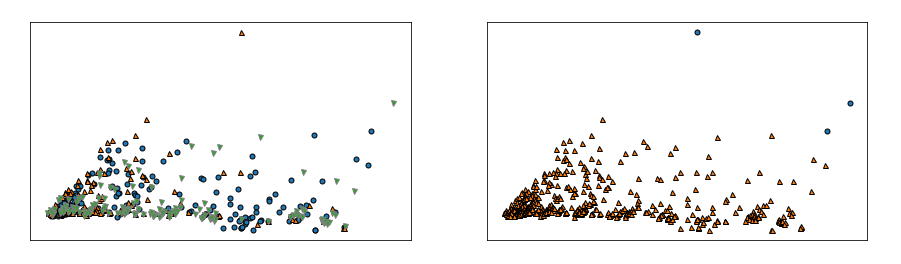

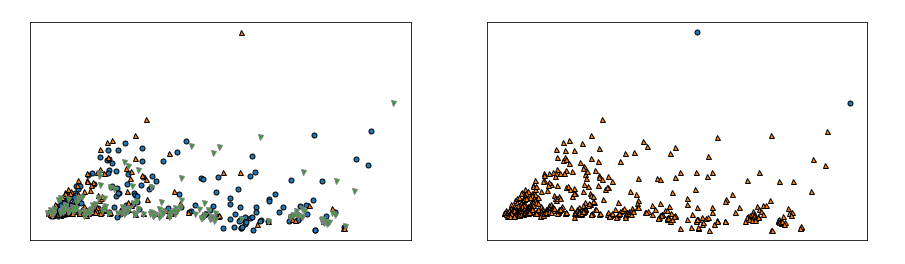

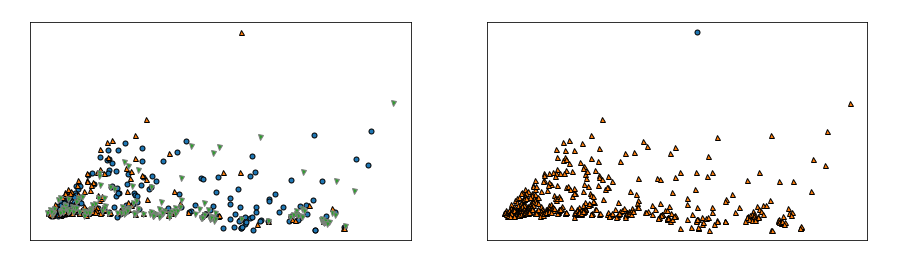

In [38]:
DBSCAN_Plot(Data=Data,NAME="dataset_Facebook",min_samples=7,eps=0.05)
DBSCAN_Plot(Data=Data,NAME="dataset_Facebook",min_samples=7,eps=0.10)
DBSCAN_Plot(Data=Data,NAME="dataset_Facebook",min_samples=7,eps=0.15)
DBSCAN_Plot(Data=Data,NAME="dataset_Facebook",min_samples=7,eps=0.20)
DBSCAN_Plot(Data=Data,NAME="dataset_Facebook",min_samples=5,eps=0.25)
DBSCAN_Plot(Data=Data,NAME="dataset_Facebook",min_samples=5,eps=0.30)
DBSCAN_Plot(Data=Data,NAME="dataset_Facebook",min_samples=5,eps=0.35)
DBSCAN_Plot(Data=Data,NAME="dataset_Facebook",min_samples=5,eps=0.40)

In [39]:
df_category = pd.DataFrame(df_category)
df_category

,index,Category
0,0,2
1,1,2
2,2,3
3,3,2
4,4,2
...,...,...
491,495,3
492,496,2
493,497,1
494,498,3


In [40]:
df_category = df_category.drop('index', axis=1)
df_category

,Category
0,2
1,2
2,3
3,2
4,2
...,...
491,3
492,2
493,1
494,3


In [41]:
labels_true = df_category.values.flatten()
labels_true

array([2, 2, 3, 2, 2, 2, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 3, 1, 3, 3, 2, 1,
       1, 3, 2, 2, 2, 3, 2, 1, 2, 2, 3, 3, 1, 2, 3, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 2, 3, 1, 3, 3, 1, 1, 3,
       1, 1, 1, 2, 3, 3, 2, 3, 1, 2, 2, 1, 1, 2, 3, 1, 1, 1, 3, 2, 3, 2,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 3, 2, 3, 1, 1, 3, 3, 2, 1, 1, 2, 2, 1, 2, 2, 2,
       3, 2, 2, 3, 2, 3, 2, 2, 1, 3, 1, 2, 3, 1, 2, 1, 2, 2, 3, 1, 2, 2,
       2, 1, 3, 1, 2, 1, 2, 2, 3, 2, 3, 3, 2, 2, 1, 2, 1, 2, 1, 3, 2, 1,
       2, 3, 3, 1, 1, 2, 3, 2, 3, 3, 2, 3, 3, 1, 2, 2, 1, 3, 2, 3, 2, 2,
       1, 2, 3, 1, 2, 2, 3, 3, 2, 1, 2, 2, 3, 2, 1, 2, 3, 1, 2, 1, 2, 1,
       2, 2, 3, 2, 1, 1, 3, 2, 3, 2, 1, 1, 2, 3, 2, 1, 2, 2, 3, 3, 1, 2,
       1, 1, 2, 1, 1, 3, 2, 2, 3, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 2, 1, 1, 3, 3, 2, 1, 2, 3, 1, 3, 1,

Hyperparameters: [ e: 0.03 , n: 10 ]
V-measure: 0.061
Silhouette score: 0.018


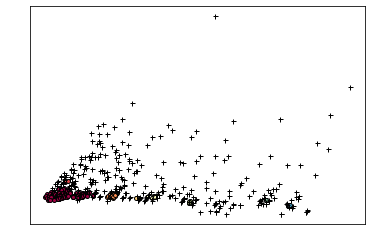

Hyperparameters: [ e: 0.06 , n: 10 ]
V-measure: 0.042
Silhouette score: 0.216


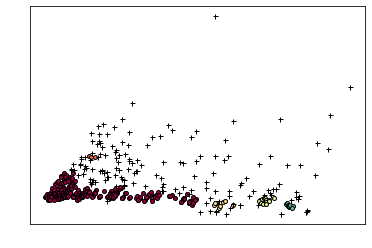

Hyperparameters: [ e: 0.09 , n: 10 ]
V-measure: 0.010
Silhouette score: 0.475


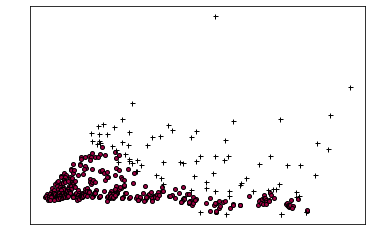

Hyperparameters: [ e: 0.12 , n: 10 ]
V-measure: 0.002
Silhouette score: 0.497


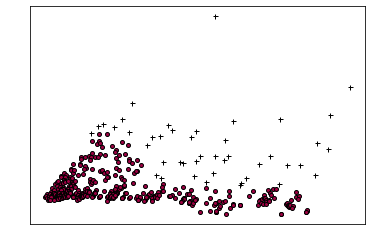

Hyperparameters: [ e: 0.15 , n: 10 ]
V-measure: 0.000
Silhouette score: 0.534


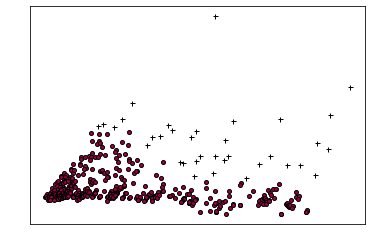

Hyperparameters: [ e: 0.18 , n: 10 ]
V-measure: 0.001
Silhouette score: 0.587


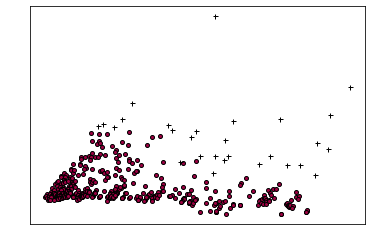

In [42]:
for i in range(1,7):
    
    # DBSCAN 하이퍼 파라미터 설정
    epsilon = round(i * 0.03, 2)
    no_of_sample = 10

    print("Hyperparameters: [ e:", epsilon , ", n:",no_of_sample, "]")

    try:
        db = DBSCAN(eps = epsilon, min_samples = no_of_sample).fit(X_pca)
        core_mask = np.zeros_like(db.labels_, dtype = bool)
        core_mask[db.core_sample_indices_] = True
        labels = db.labels_

        print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
        print("Silhouette score: %0.3f" % metrics.silhouette_score(X_pca, labels))
    except:
        pass
        
    unique_labels = set(labels) # 유일 label 추출
    colors = [plt.cm.Spectral(each) # 각 label 별 색 추출
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors): # index, 색정보 반복
        if k == -1:
            col = [0, 0, 0, 1] # black
        class_member_mask = (labels == k)

        # Core sample 표시
        xy = X_pca[class_member_mask & core_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=4)

        # Noise sample 표시
        xy = X_pca[class_member_mask & ~core_mask]
        plt.plot(xy[:, 0], xy[:, 1], '+', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=5)
    plt.show()

Hyperparameters: [ e: 0.01 , n: 10 ]
V-measure: 0.041
Silhouette score: -0.145


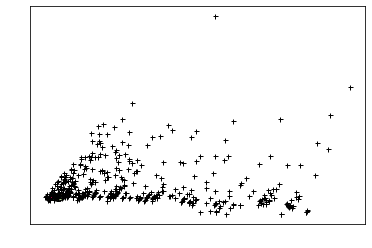

Hyperparameters: [ e: 0.02 , n: 10 ]
V-measure: 0.019
Silhouette score: -0.114


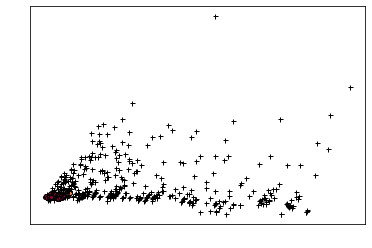

Hyperparameters: [ e: 0.03 , n: 10 ]
V-measure: 0.061
Silhouette score: 0.018


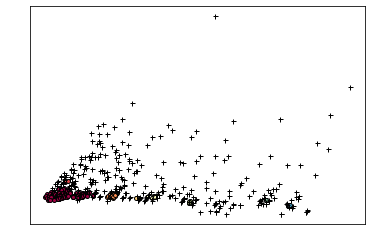

Hyperparameters: [ e: 0.04 , n: 10 ]
V-measure: 0.038
Silhouette score: 0.249


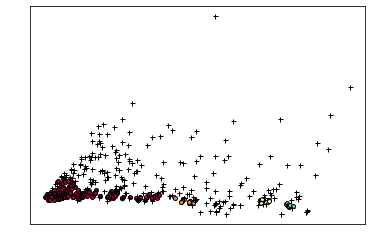

Hyperparameters: [ e: 0.05 , n: 10 ]
V-measure: 0.049
Silhouette score: 0.296


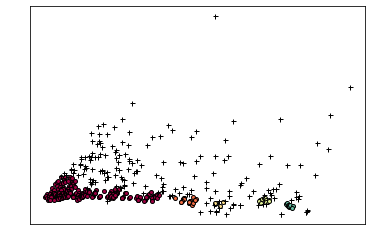

Hyperparameters: [ e: 0.06 , n: 10 ]
V-measure: 0.042
Silhouette score: 0.216


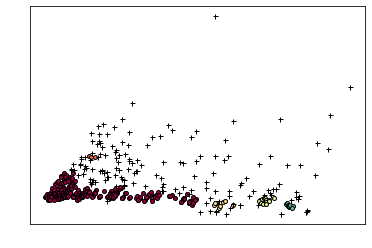

Hyperparameters: [ e: 0.07 , n: 10 ]
V-measure: 0.029
Silhouette score: 0.384


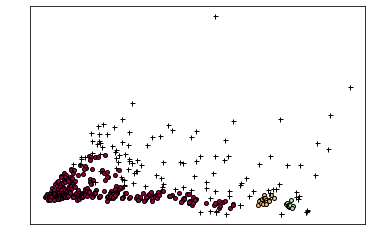

Hyperparameters: [ e: 0.08 , n: 10 ]
V-measure: 0.012
Silhouette score: 0.453


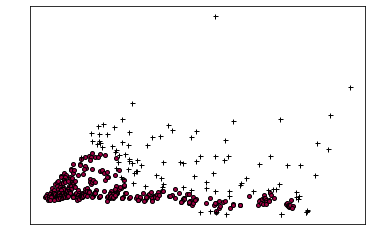

Hyperparameters: [ e: 0.09 , n: 10 ]
V-measure: 0.010
Silhouette score: 0.475


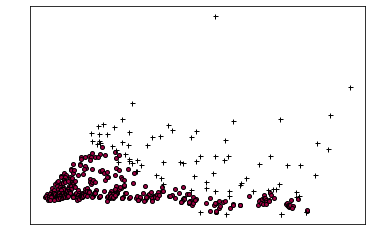

In [43]:
for i in range(1,10):
    
    # DBSCAN 하이퍼 파라미터 설정
    epsilon = round(0.01*i, 2)
    no_of_sample = 10

    print("Hyperparameters: [ e:", epsilon , ", n:",no_of_sample, "]")

    try:
        db = DBSCAN(eps = epsilon, min_samples = no_of_sample).fit(X_pca)
        core_mask = np.zeros_like(db.labels_, dtype = bool)
        core_mask[db.core_sample_indices_] = True
        labels = db.labels_

        print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
        print("Silhouette score: %0.3f" % metrics.silhouette_score(X_pca, labels))
    except:
        pass
    
    unique_labels = set(labels) # 유일 label 추출
    colors = [plt.cm.Spectral(each) # 각 label 별 색 추출
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors): # index, 색정보 반복
        if k == -1:
            col = [0, 0, 0, 1] # black
        class_member_mask = (labels == k)

        # Core sample 표시
        xy = X_pca[class_member_mask & core_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=4)

        # Noise sample 표시
        xy = X_pca[class_member_mask & ~core_mask]
        plt.plot(xy[:, 0], xy[:, 1], '+', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=5)
    plt.show()
    

Hyperparameters: [ e: 0.05 , n: 1 ]
V-measure: 0.105
Silhouette score: 0.022


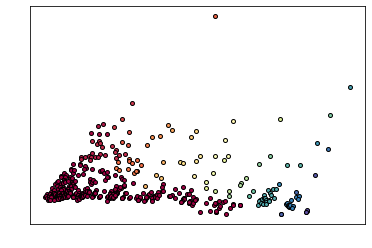

Hyperparameters: [ e: 0.05 , n: 2 ]
V-measure: 0.054
Silhouette score: 0.130


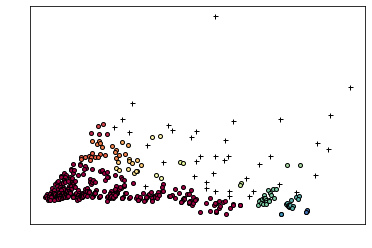

Hyperparameters: [ e: 0.05 , n: 3 ]
V-measure: 0.040
Silhouette score: 0.144


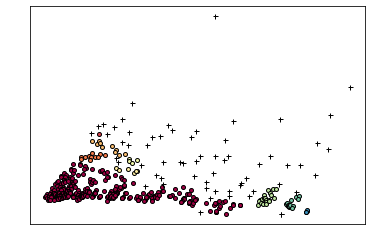

Hyperparameters: [ e: 0.05 , n: 4 ]
V-measure: 0.043
Silhouette score: 0.142


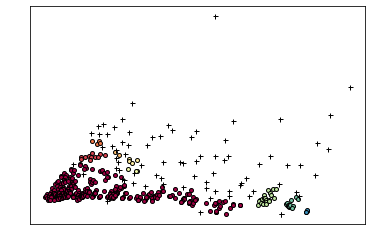

Hyperparameters: [ e: 0.05 , n: 5 ]
V-measure: 0.036
Silhouette score: 0.118


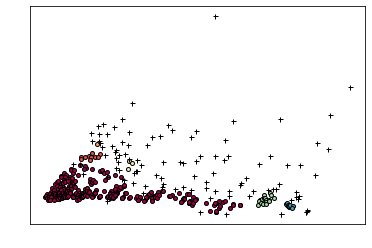

Hyperparameters: [ e: 0.05 , n: 6 ]
V-measure: 0.034
Silhouette score: -0.134


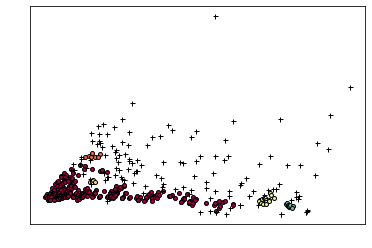

Hyperparameters: [ e: 0.05 , n: 7 ]
V-measure: 0.038
Silhouette score: -0.108


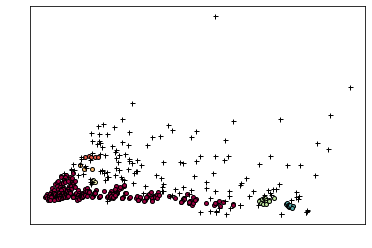

Hyperparameters: [ e: 0.05 , n: 8 ]
V-measure: 0.046
Silhouette score: 0.231


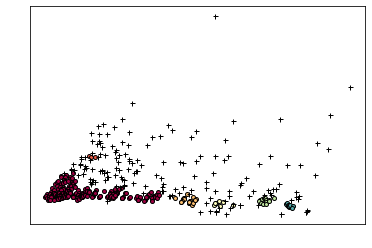

Hyperparameters: [ e: 0.05 , n: 9 ]
V-measure: 0.047
Silhouette score: 0.220


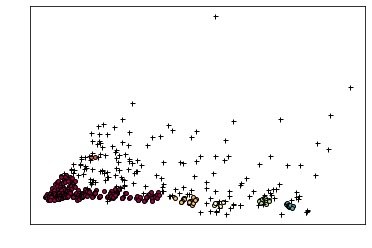

Hyperparameters: [ e: 0.05 , n: 10 ]
V-measure: 0.049
Silhouette score: 0.296


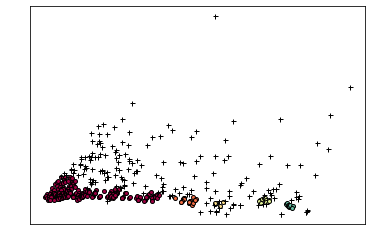

Hyperparameters: [ e: 0.05 , n: 11 ]
V-measure: 0.052
Silhouette score: 0.288


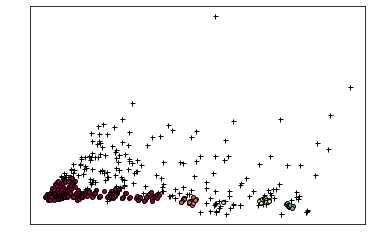

Hyperparameters: [ e: 0.05 , n: 12 ]
V-measure: 0.044
Silhouette score: 0.262


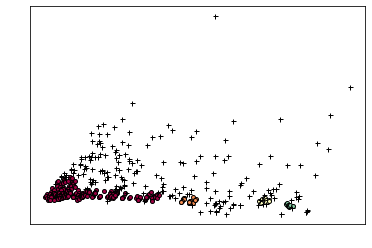

Hyperparameters: [ e: 0.05 , n: 13 ]
V-measure: 0.023
Silhouette score: 0.225


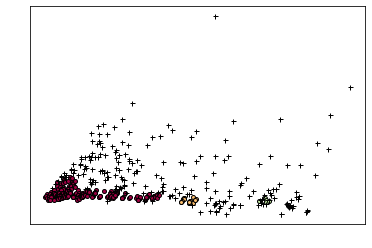

Hyperparameters: [ e: 0.05 , n: 14 ]
V-measure: 0.020
Silhouette score: 0.216


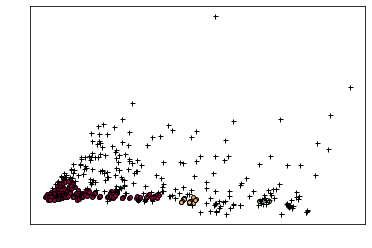

In [44]:
for i in range(1,15):
    
    # DBSCAN 하이퍼 파라미터 설정
    epsilon = round(0.05, 2)
    no_of_sample = i

    print("Hyperparameters: [ e:", epsilon , ", n:",no_of_sample, "]")

    try:
        db = DBSCAN(eps = epsilon, min_samples = no_of_sample).fit(X_pca)
        core_mask = np.zeros_like(db.labels_, dtype = bool)
        core_mask[db.core_sample_indices_] = True
        labels = db.labels_

        print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
        print("Silhouette score: %0.3f" % metrics.silhouette_score(X_pca, labels))
    except:
        pass
    unique_labels = set(labels) # 유일 label 추출
    colors = [plt.cm.Spectral(each) # 각 label 별 색 추출
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors): # index, 색정보 반복
        if k == -1:
            col = [0, 0, 0, 1] # black
        class_member_mask = (labels == k)

        # Core sample 표시
        xy = X_pca[class_member_mask & core_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=4)

        # Noise sample 표시
        xy = X_pca[class_member_mask & ~core_mask]
        plt.plot(xy[:, 0], xy[:, 1], '+', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=5)
    plt.show()

Hyperparameters: [ e: 0.18 , n: 1 ]
V-measure: 0.029
Silhouette score: 0.467


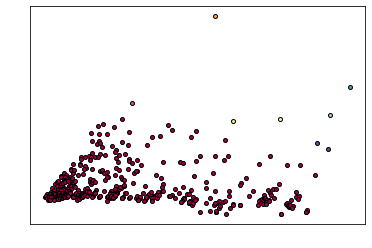

Hyperparameters: [ e: 0.18 , n: 2 ]
V-measure: 0.006
Silhouette score: 0.508


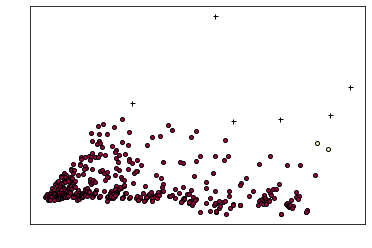

Hyperparameters: [ e: 0.18 , n: 3 ]
V-measure: 0.000
Silhouette score: 0.635


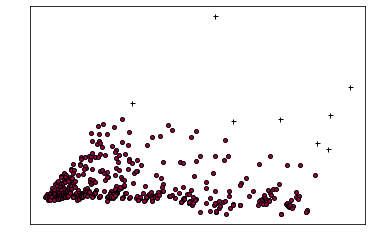

Hyperparameters: [ e: 0.18 , n: 4 ]
V-measure: 0.000
Silhouette score: 0.635


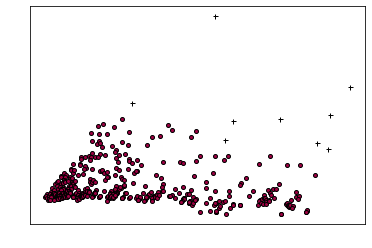

Hyperparameters: [ e: 0.18 , n: 5 ]
V-measure: 0.000
Silhouette score: 0.635


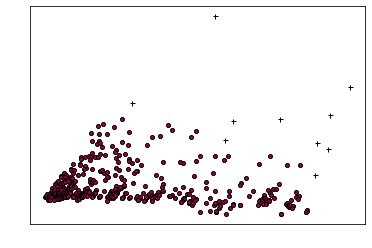

Hyperparameters: [ e: 0.18 , n: 6 ]
V-measure: 0.000
Silhouette score: 0.635


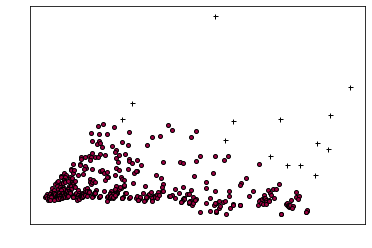

Hyperparameters: [ e: 0.18 , n: 7 ]
V-measure: 0.000
Silhouette score: 0.635


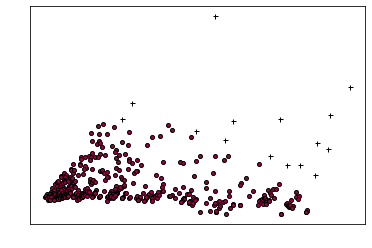

Hyperparameters: [ e: 0.18 , n: 8 ]
V-measure: 0.001
Silhouette score: 0.587


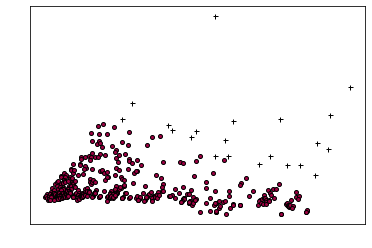

Hyperparameters: [ e: 0.18 , n: 9 ]
V-measure: 0.001
Silhouette score: 0.587


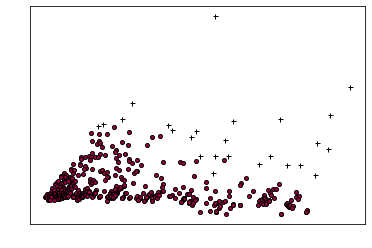

In [45]:
for i in range(1,10):
    
    # DBSCAN 하이퍼 파라미터 설정
    epsilon = round(0.18, 2)
    no_of_sample = i

    print("Hyperparameters: [ e:", epsilon , ", n:",no_of_sample, "]")

#     try:
    db = DBSCAN(eps = epsilon, min_samples = no_of_sample).fit(X_pca)
    core_mask = np.zeros_like(db.labels_, dtype = bool)
    core_mask[db.core_sample_indices_] = True
    labels = db.labels_

    print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
    print("Silhouette score: %0.3f" % metrics.silhouette_score(X_pca, labels))
#     except:
#         pass
        
    unique_labels = set(labels) # 유일 label 추출
    colors = [plt.cm.Spectral(each) # 각 label 별 색 추출
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors): # index, 색정보 반복
        if k == -1:
            col = [0, 0, 0, 1] # black
        class_member_mask = (labels == k)

        # Core sample 표시
        xy = X_pca[class_member_mask & core_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=4)

        # Noise sample 표시
        xy = X_pca[class_member_mask & ~core_mask]
        plt.plot(xy[:, 0], xy[:, 1], '+', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=5)
    plt.show()

## Affinity Propagation

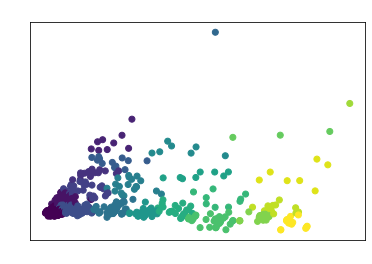

Number of clusters: 22
damping factor: 0.5
AffinityPropagation 군집화의 실루엣 계수: 0.39


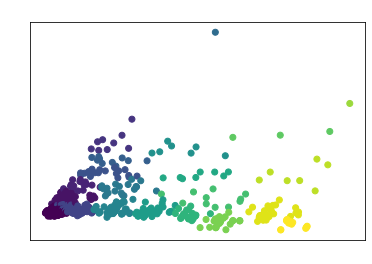

Number of clusters: 21
damping factor: 0.6
AffinityPropagation 군집화의 실루엣 계수: 0.42


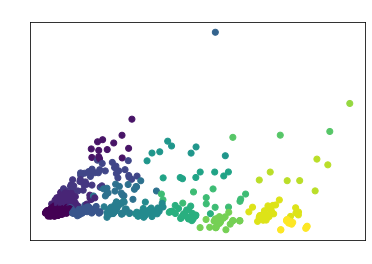

Number of clusters: 20
damping factor: 0.7
AffinityPropagation 군집화의 실루엣 계수: 0.44


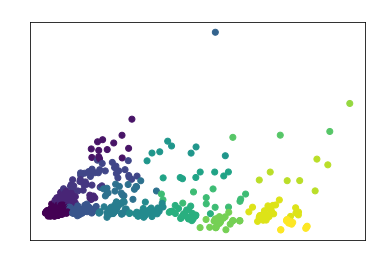

Number of clusters: 20
damping factor: 0.8
AffinityPropagation 군집화의 실루엣 계수: 0.43


In [46]:
 for i in [0.5, 0.6, 0.7, 0.8]:
    # AffinityPropagation 군집화
    af = AffinityPropagation(damping=i, preference=None).fit(X_pca)
    af_labels = af.labels_

    # 군집화 결과 시각화
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=af_labels)
    plt.title("AffinityPropagation Clustering")
    plt.show()

    # 군집별 실루엣 계수
    ap_silhouette_values = silhouette_score(X_pca, af_labels)
    
    n_clusters = len(np.unique(af_labels[af_labels >= 0]))
    print(f"Number of clusters: {n_clusters}")
    print(f"damping factor: {i}")
    print("AffinityPropagation 군집화의 실루엣 계수: %.2f"% ap_silhouette_values)